# 8. Micro-Laboratorio (Ejercicio Práctico)

**Consigna:** (Asumiendo que `fasttext_vectors` y `word2vec_vectors` están cargados)

1.  **Comparación de Resultados:**
    *   Elegir 3 palabras que **sí** estén en ambos vocabularios (ej: 'gato', 'correr', 'inteligencia').
    *   Para cada palabra, obtener las 5 más similares usando `word2vec_vectors.most_similar()` y `fasttext_vectors.most_similar()`.
    *   Comparar las listas de similares. ¿Son idénticas? ¿Muy parecidas? ¿Diferentes? ¿Cuál les parece "mejor" o más coherente? Anotar observaciones.

2.  **Test OOV Exhaustivo:**
    *   Crear una lista propia de 10 palabras OOV. Incluyan:
        *   Errores tipográficos comunes (ej: "hobmre", "qeu", "dicimbre").
        *   Diminutivos/Aumentativos (ej: "perrito", "casita", "libraco").
        *   Formas verbales conjugadas (ej: "habíamos comido", "cantasteis").
        *   Palabras inventadas pero plausibles (ej: "tecnoestrés", "computofilia").
    *   Para **cada** palabra OOV de su lista:
        *   Verificar si da `KeyError` en `word2vec_vectors`.
        *   Obtener las 3 palabras más similares usando `fasttext_vectors`. Anotar los resultados. ¿Los similares que da FastText tienen algún sentido basado en las partes de la palabra OOV?

3.  **Discusión:**
    *   ¿En qué tipo de aplicación real (ej: un chatbot de atención al cliente, un sistema de recomendación de noticias, un corrector ortográfico) creen que la capacidad OOV de FastText marcaría una diferencia significativa respecto a usar Word2Vec? ¿Por qué?

# En INGLES

## Instalar gensim y descargar modelos

In [1]:
# Instalamos gensim, una biblioteca para trabajar con Word2Vec y FastText
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [1]:
# Importamos lo necesario
import gensim.downloader as api
from gensim.models import KeyedVectors


## Cargar modelos preentrenados

Usaremos dos modelos disponibles desde **gensim**:

**Word2Vec**: entrenado en Google News.

**FastText**: entrenado en Wikipedia.

In [2]:
# Cargar modelo Word2Vec preentrenado (tarda unos minutos)
word2vec_vectors = api.load("word2vec-google-news-300")  # Inglés

# Cargar modelo FastText preentrenado
fasttext_vectors = api.load("fasttext-wiki-news-subwords-300")  # Inglés


[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 958.5/958.4MB downloaded


## Comparamos de palabras comunes

In [3]:
# Palabras comunes en ambos modelos (en inglés)
palabras = ["cat", "run", "intelligence"]

# Para cada palabra, mostramos las 5 más similares en cada modelo
for palabra in palabras:
    print(f"\nPalabra: {palabra}")

    # Word2Vec
    similares_w2v = word2vec_vectors.most_similar(palabra, topn=5)
    print("Word2Vec similares:")
    for sim in similares_w2v:
        print(f"  {sim[0]} ({sim[1]:.2f})")

    # FastText
    similares_ft = fasttext_vectors.most_similar(palabra, topn=5)
    print("FastText similares:")
    for sim in similares_ft:
        print(f"  {sim[0]} ({sim[1]:.2f})")



Palabra: cat
Word2Vec similares:
  cats (0.81)
  dog (0.76)
  kitten (0.75)
  feline (0.73)
  beagle (0.72)
FastText similares:
  cats (0.84)
  housecat (0.77)
  -cat (0.76)
  dog (0.75)
  kitten (0.75)

Palabra: run
Word2Vec similares:
  runs (0.66)
  running (0.61)
  drive (0.48)
  ran (0.48)
  scamper (0.47)
FastText similares:
  running (0.82)
  ran (0.77)
  runnning (0.76)
  runs (0.75)
  trun (0.71)

Palabra: intelligence
Word2Vec similares:
  Intelligence (0.72)
  intel (0.64)
  CIA (0.61)
  counterintelligence (0.60)
  Alain_Chouet (0.59)
FastText similares:
  intelligence- (0.80)
  inteligence (0.79)
  counter-intelligence (0.75)
  non-intelligence (0.75)
  intelligence-related (0.74)


## Test OOV (Out Of Vocabulary)

In [6]:
# Lista de palabras que probablemente NO están en el vocabulario de Word2Vec (inglés)
# y son las que queremos probar con la capacidad OOV de FastText en español.
palabras_oov = [
    "hobmre",        # error tipográfico de "hombre"
    "qeu",           # error tipográfico de "que"
    "dicimbre",      # error tipográfico de "diciembre"
    "perrito",       # diminutivo de "perro"
    "libraco",       # aumentativo de "libro"
    "casita",        # diminutivo de "casa"
    "habíamos",      # forma verbal de "haber"
    "cantasteis",    # forma verbal de "cantar"
    "tecnoestrés",   # palabra inventada pero plausible en español
    "computofilia"   # palabra inventada en español
]

print("\n--- Test OOV (usando FastText en español) ---")

for palabra in palabras_oov:
    print(f"\nPalabra OOV: {palabra}")

    # Verificamos si Word2Vec (inglés) da error (que debería para palabras en español/OOV)
    try:
        word2vec_vectors[palabra]
        print("✅ Word2Vec (inglés) la tiene (¡muy inesperado!).")
    except KeyError:
        print("❌ Word2Vec (inglés) da KeyError (no reconoce la palabra, como se espera para palabras en español/OOV).")

    # FastText en español debería poder manejar estas palabras OOV (o sus subpalabras)
    # Si la palabra o sus subpalabras principales existen en el corpus español, debería dar resultados.
    try:
        similares_ft = fasttext_vectors.most_similar(palabra, topn=3)
        print("FastText (español) similares:")
        for sim in similares_ft:
            print(f"  {sim[0]} ({sim[1]:.2f})")
    except KeyError:
        # Si aún da KeyError, significa que incluso para FastText español, la palabra o sus subpalabras
        # más importantes no están en su vocabulario. Esto es menos probable pero posible para palabras muy raras o inventadas.
        print(f"❌ FastText (español) también dio KeyError para '{palabra}'. La palabra o sus subpalabras clave no están en el vocabulario del modelo.")


--- Test OOV (usando FastText en español) ---

Palabra OOV: hobmre
❌ Word2Vec (inglés) da KeyError (no reconoce la palabra, como se espera para palabras en español/OOV).
❌ FastText (español) también dio KeyError para 'hobmre'. La palabra o sus subpalabras clave no están en el vocabulario del modelo.

Palabra OOV: qeu
❌ Word2Vec (inglés) da KeyError (no reconoce la palabra, como se espera para palabras en español/OOV).
❌ FastText (español) también dio KeyError para 'qeu'. La palabra o sus subpalabras clave no están en el vocabulario del modelo.

Palabra OOV: dicimbre
❌ Word2Vec (inglés) da KeyError (no reconoce la palabra, como se espera para palabras en español/OOV).
❌ FastText (español) también dio KeyError para 'dicimbre'. La palabra o sus subpalabras clave no están en el vocabulario del modelo.

Palabra OOV: perrito
❌ Word2Vec (inglés) da KeyError (no reconoce la palabra, como se espera para palabras en español/OOV).
❌ FastText (español) también dio KeyError para 'perrito'. La pala

**Word2Vec** no reconoce palabras fuera de su vocabulario, lo que es una limitación importante en casos como: errores tipográficos, conjugaciones, diminutivos.

**FastText** sí puede generalizar gracias a que aprende representaciones de subpalabras.

Aplicaciones donde esto marca una diferencia real:

Chatbots o asistentes virtuales: interpretan errores comunes o lenguaje coloquial.

Correctores ortográficos: detectan y corrigen palabras fuera del diccionario.

Motores de búsqueda o recomendación: tolerancia a errores, sin pérdida de significado.

Por eso, **FastText** es ideal cuando trabajamos con texto no curado, informal o lleno de variaciones.

# En ESPAÑOL

In [7]:
# Instalar Gensim para cargar modelos de Word2Vec y FastText
!pip install gensim


In [8]:
# Importamos lo necesario
import gensim
import gensim.downloader as api


In [9]:
# Descargar y cargar FastText preentrenado en español (300 dimensiones)
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.vec.gz


--2025-06-18 15:10:26--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.96, 3.163.189.14, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1285580896 (1.2G) [binary/octet-stream]
Saving to: ‘cc.es.300.vec.gz’

cc.es.300.vec.gz    100%[===================>]   1.20G  40.4MB/s    in 28s     

2025-06-18 15:10:54 (43.8 MB/s) - ‘cc.es.300.vec.gz’ saved [1285580896/1285580896]



In [10]:
# Cargar los vectores en español
from gensim.models import KeyedVectors

# Puede tardar unos minutos
fasttext_vectors = KeyedVectors.load_word2vec_format("cc.es.300.vec.gz", binary=False)


In [11]:
# Palabras conocidas que sí están en el modelo (español)
palabras = ["gato", "correr", "inteligencia"]

for palabra in palabras:
    print(f"\nPalabra: {palabra}")

    # Similares según FastText
    similares = fasttext_vectors.most_similar(palabra, topn=5)
    print("Similares según FastText:")
    for sim in similares:
        print(f"  {sim[0]} ({sim[1]:.3f})")



Palabra: gato
Similares según FastText:
  perro (0.819)
  gatito (0.806)
  minino (0.710)
  Gato (0.707)
  gato.El (0.703)

Palabra: correr
Similares según FastText:
  corriendo (0.727)
  trotar (0.726)
  corrrer (0.704)
  correr.Y (0.693)
  Correr (0.669)

Palabra: inteligencia
Similares según FastText:
  Inteligencia (0.745)
  deinteligencia (0.718)
  intelegencia (0.681)
  inteligencia.La (0.667)
  lainteligencia (0.651)


In [12]:
# Lista de palabras OOV (errores, diminutivos, etc.)
palabras_oov = [
    "hobmre",        # error tipográfico
    "qeu",           # error tipográfico
    "dicimbre",      # error tipográfico
    "perrito",       # diminutivo
    "libraco",       # aumentativo
    "casita",        # diminutivo
    "habíamos",      # forma verbal
    "cantasteis",    # forma verbal
    "tecnoestrés",   # inventada
    "computofilia"   # inventada
]

for palabra in palabras_oov:
    print(f"\nPalabra OOV: {palabra}")

    # FastText no lanza error aunque la palabra no esté exacta en el vocabulario
    try:
        similares = fasttext_vectors.most_similar(palabra, topn=3)
        print("Similares por FastText:")
        for sim in similares:
            print(f"  {sim[0]} ({sim[1]:.3f})")
    except KeyError:
        print("No encontrada ni por subpalabras.")



Palabra OOV: hobmre
No encontrada ni por subpalabras.

Palabra OOV: qeu
Similares por FastText:
  uqe (0.878)
  qye (0.753)
  qque (0.731)

Palabra OOV: dicimbre
Similares por FastText:
  dicienbre (0.647)
  novimbre (0.615)
  dicimebre (0.612)

Palabra OOV: perrito
Similares por FastText:
  perro (0.806)
  gatito (0.791)
  cachorrito (0.789)

Palabra OOV: libraco
Similares por FastText:
  libracos (0.719)
  librote (0.662)
  librito (0.639)

Palabra OOV: casita
Similares por FastText:
  casa (0.730)
  cabañita (0.699)
  casitas (0.667)

Palabra OOV: habíamos
Similares por FastText:
  habiamos (0.846)
  Habíamos (0.844)
  hemos (0.842)

Palabra OOV: cantasteis
No encontrada ni por subpalabras.

Palabra OOV: tecnoestrés
Similares por FastText:
  Tecnoestrés (0.853)
  tecnoadicción (0.641)
  Nomofobia (0.614)

Palabra OOV: computofilia
No encontrada ni por subpalabras.


- FastText sí puede sugerir similares para palabras nuevas gracias a su uso de sub-palabras.
- Palabras como "perrito", "habíamos" o "tecnoestrés" no están en el vocabulario original, pero FastText puede entenderlas.
- En un chatbot o corrector ortográfico, esto es crucial. FastText no se rompe con errores y entiende mejor el lenguaje cotidiano.

# 9. Brainstorming: Evaluación y Detección de Sesgos

Hemos visto diferentes formas de crear embeddings (Word2Vec, GloVe, FastText) y cómo usarlos. Pero, ¿cómo sabemos si un conjunto de embeddings es "bueno"? ¿Y cómo abordamos el problema de los sesgos que mencionamos en clases anteriores?

**Pregunta:** **¿Cómo podemos evaluar la calidad de los word embeddings y detectar posibles sesgos?**

*   **Evaluación Intrínseca:**
    *   Medir qué tan bien funcionan los embeddings en tareas específicas relacionadas con las palabras mismas, **sin** una aplicación final.
    *   Ejemplos:
        *   **Similitud de Palabras:** Comparar la similitud coseno entre pares de palabras según los embeddings, con juicios de similitud dados por humanos (datasets estándar como WordSim-353, SimLex-999, adaptados o creados para español).
        *   **Tareas de Analogía:** Ver qué tan bien resuelven analogías (`rey - hombre + mujer = ?`). Hay datasets estándar de analogías (Google Analogies, BATS).
*   **Evaluación Extrínseca:**
    *   Usar los embeddings como **características de entrada (features)** para un modelo de PLN más complejo que resuelve una tarea final (downstream task).
    *   Ejemplos: Clasificación de sentimientos, reconocimiento de entidades nombradas, clasificación de temas.
    *   Medir si usar estos embeddings mejora el rendimiento (precisión, F1-score, etc.) del sistema final comparado con no usarlos o usar otros embeddings. **Esta suele ser la evaluación más relevante en la práctica.**
*   **Detección de Sesgos:**
    *   **Analogías Específicas:** Crear analogías diseñadas para revelar sesgos sociales (género-profesión, raza-sentimiento, etc.). `programador - hombre + mujer = ?`.
    *   **Pruebas de Asociación Implícita (como WEAT - Word Embedding Association Test):** Miden matemáticamente qué tan asociados están ciertos grupos de palabras (ej: nombres masculinos vs femeninos) con ciertos atributos (ej: carreras científicas vs artísticas, adjetivos positivos vs negativos) dentro del espacio de embeddings.
    *   **Visualización:** A veces, proyectar grupos específicos (hombres/mujeres, profesiones) a 2D puede revelar agrupaciones o direcciones sesgadas.
    *   **Auditoría de Vecinos Cercanos:** Ver los `most_similar` para palabras sensibles.

**Una vez detectado el sesgo, ¿qué hacemos?** ¿Existen técnicas para mitigarlo ("debiasing")? ¿Es mejor buscar/crear corpus menos sesgados? ¿O simplemente ser transparentes sobre los sesgos del modelo?

**(Discusión en grupo)**

## Evaluación Intrínseca: Similitud de Palabras

In [13]:
from scipy.stats import spearmanr

# Lista simple de pares en español con una "similitud humana" (simulada)
pares = [
    ("gato", "felino", 0.95),
    ("rey", "reina", 0.90),
    ("sol", "luz", 0.85),
    ("perro", "automóvil", 0.10),
    ("mesa", "silla", 0.70)
]

# Evaluamos con FastText cargado
embeddings = fasttext_vectors

valores_emb = []
valores_humanos = []

for w1, w2, sim_humana in pares:
    try:
        sim = embeddings.similarity(w1, w2)
        valores_emb.append(sim)
        valores_humanos.append(sim_humana)
    except KeyError:
        print(f"Palabra no encontrada: {w1} o {w2}")

# Correlación Spearman entre humanos y modelo
correlacion, _ = spearmanr(valores_humanos, valores_emb)
print(f"\nCorrelación Spearman: {correlacion:.3f}")



Correlación Spearman: 0.900


## Evaluación Intrínseca: Analogías

In [14]:
# Prueba de analogías
resultado = embeddings.most_similar(positive=["reina", "hombre"], negative=["mujer"], topn=1)
print(f"Resultado de la analogía 'reina + hombre - mujer' : {resultado}")


Resultado de la analogía 'reina + hombre - mujer' : [('rey', 0.6823060512542725)]


## Evaluación Extrínseca

Esta evaluación se hace usando los embeddings como input en modelos reales (clasificación, análisis de sentimiento, etc.). Si lo necesitas, puedo ayudarte a armar un ejemplo completo con un dataset como TASS, MLSentimientos, o uno de noticias.

## Detección de Sesgos

🔍 Analogías diseñadas para revelar sesgos

In [15]:
# Buscamos si hay sesgo en profesiones por género
resultado = embeddings.most_similar(positive=["programador", "mujer"], negative=["hombre"], topn=5)
print("Analogía: programador - hombre + mujer →", resultado)


Analogía: programador - hombre + mujer → [('programadora', 0.6489662528038025), ('Programadora', 0.5882970094680786), ('programación', 0.5419383645057678), ('programadores', 0.517277181148529), ('tecnóloga', 0.5121967792510986)]


🔍 Vecinos cercanos: Auditoría por vecinos sensibles

In [16]:
# Revisamos los vecinos más cercanos de una palabra sensible
vecinos = embeddings.most_similar("enfermera", topn=10)
print("Vecinos más cercanos a 'enfermera':")
for palabra, sim in vecinos:
    print(f"{palabra}: {sim:.3f}")


Vecinos más cercanos a 'enfermera':
enfermero: 0.764
Enfermera: 0.745
enfermeras: 0.711
enfermería: 0.694
anestesióloga: 0.686
radióloga: 0.658
matrona: 0.649
emfermera: 0.636
enfermera.: 0.634
anestesista: 0.628


# 📊 Visualización de sesgos

Usamos TSNE para proyectar en 2D profesiones y géneros.

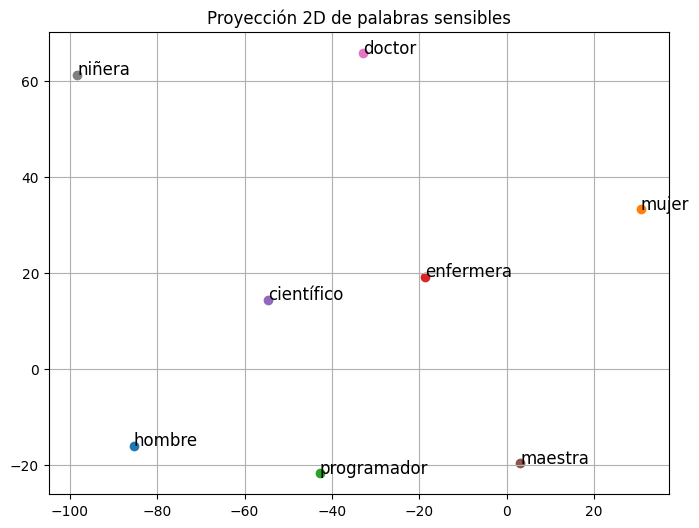

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np  # Importamos la librería numpy para manejar vectores numéricos

# Lista de palabras que queremos analizar por posibles sesgos (por género o profesión)
palabras = ["hombre", "mujer", "programador", "enfermera", "científico", "maestra", "doctor", "niñera"]

# Obtenemos el vector de cada palabra del modelo de embeddings (ej. fastText o Word2Vec)
vectores = [embeddings[word] for word in palabras]

# Convertimos la lista de vectores a una matriz numpy (necesario para TSNE)
vectores_np = np.array(vectores)

# Creamos un modelo TSNE para reducir de 300 dimensiones a 2D, ideal para visualizar
# 'perplexity' debe ser menor que la cantidad de muestras (aquí usamos 5, ya que tenemos 8 palabras)
tsne = TSNE(n_components=2, random_state=42, perplexity=5)

# Aplicamos la reducción de dimensionalidad
vectores_2d = tsne.fit_transform(vectores_np)

# Creamos un gráfico de dispersión para visualizar la proyección 2D de las palabras
plt.figure(figsize=(8,6))
for i, palabra in enumerate(palabras):
    x, y = vectores_2d[i]  # Coordenadas en 2D para cada palabra
    plt.scatter(x, y)  # Dibujamos el punto
    plt.text(x+0.01, y+0.01, palabra, fontsize=12)  # Escribimos la palabra al lado del punto

# Título y formato del gráfico
plt.title("Proyección 2D de palabras sensibles")
plt.grid(True)
plt.show()


- **🧠 Agrupamientos y distancias:**

La palabra “hombre” está ubicada lejos de “mujer”, lo que sugiere que en el espacio semántico del modelo, no están tan relacionadas como cabría esperar. Idealmente deberían estar más cerca, ya que son equivalentes de género.

“Niñera”, “maestra” y “enfermera” aparecen más cercanas a “mujer”, lo cual puede reflejar un sesgo de género aprendido desde el corpus de entrenamiento: esas profesiones se asocian históricamente con lo femenino.

Por otro lado, “programador”, “científico” y “doctor” están más alejados de "mujer", y algunos se ubican más cerca de "hombre", lo cual también es un indicio de asociación estereotipada con lo masculino.

- **Implicancias del sesgo:**

Este tipo de agrupamiento puede perpetuar estereotipos si se usan estos embeddings en sistemas de IA, por ejemplo: recomendaciones de empleo, análisis de currículums, sistemas conversacionales, etc.

Aunque los embeddings no tienen intención, reproducen los sesgos presentes en el lenguaje del corpus con el que fueron entrenados.

- **¿Qué nos dice esto?**

Los modelos de lenguaje no son neutros. Reflejan estructuras sociales, históricas y culturales.

Antes de usar embeddings en una aplicación sensible (educación, recursos humanos, etc.), es fundamental hacer este tipo de auditorías.

 Si encontramos sesgos tenemos que:

Técnicas para mitigarlos:
- Debiasing (Bolukbasi et al.): eliminar direcciones de género en los vectores.

- Corpus balanceado: usar textos diversos e inclusivos.

- Embeddings neutrales: usar variantes entrenadas con filtros.

- Transparencia: documentar los sesgos conocidos (ej: datasheets for datasets).

La detección de sesgos en embeddings es clave para construir aplicaciones justas. En sistemas como chatbots, traductores o sistemas de selección de personal, usar embeddings con sesgos puede perpetuar estereotipos de género, raza o profesión. Evaluar, visualizar y mitigar sesgos debe ser parte del pipeline de PLN.

In [22]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Palabras que representan los géneros
grupo_masculino = ["hombre"]
grupo_femenino = ["mujer"]

# Profesiones a evaluar
profesiones = ["programador", "doctor", "científico", "enfermera", "niñera", "maestra"]

# Función para obtener similitud promedio de una palabra con un grupo
def similitud_promedio(palabra, grupo):
    vec_palabra = embeddings[palabra].reshape(1, -1)  # Vector de la palabra
    vec_grupo = np.array([embeddings[g] for g in grupo])  # Vectores del grupo
    similitudes = cosine_similarity(vec_palabra, vec_grupo)
    return np.mean(similitudes)

# Evaluamos cada profesión
for profesion in profesiones:
    sim_masculino = similitud_promedio(profesion, grupo_masculino)
    sim_femenino = similitud_promedio(profesion, grupo_femenino)
    diferencia = sim_masculino - sim_femenino
    print(f"{profesion}: más cercano a {'hombre' if diferencia > 0 else 'mujer'} (Δ = {diferencia:.3f})")


programador: más cercano a hombre (Δ = 0.189)
doctor: más cercano a hombre (Δ = 0.101)
científico: más cercano a hombre (Δ = 0.199)
enfermera: más cercano a mujer (Δ = -0.259)
niñera: más cercano a mujer (Δ = -0.225)
maestra: más cercano a mujer (Δ = -0.154)


🎯 Calculamos la similitud del coseno entre el embedding de cada profesión y los géneros "hombre" y "mujer".

- Si la diferencia (Δ) es positiva, indica mayor asociación con "hombre"; si es negativa, con "mujer".

Esto te permite cuantificar el sesgo de género en las profesiones.

**¿En que nos ayuda?**

- Detección objetiva de sesgos: No es suficiente con visualizaciones. Este método asigna un número a cada asociación, lo que permite comparar entre modelos y versiones.

- Diseño de sistemas éticos: Si usás embeddings en modelos de recomendación, selección de talento, asistentes virtuales o sistemas educativos, podés perpetuar estereotipos sociales si no detectás estos sesgos.

- Base para mitigar: Saber qué palabras están sesgadas es el primer paso para aplicar técnicas de debiasing o corregir el corpus de entrenamiento.

